In [1]:
def warn(*args, **kwargs):
    pass
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#! apt-get install git
#! git clone https://github.com/davidunga/ml-2024.git
#!python /content/ml-2024/data.py

In [3]:
df=pd.read_csv("/home/labs/nyosef/elibe/ML_healthcare/data/dataset_diabetes/diabetic_data.csv")
print(df.shape)
df.head(5)

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# LGBM

In [4]:
import custom_classes_and_functions as ccf


In [5]:
X_train, X_test, y_train, y_test= ccf.complete_pp(df,ohe=False,feat_eng=True,sqrt=True)
X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts()

df.shape = (69970, 50)
df.readmitted.value_counts: readmitted
False    63693
True      6277
Name: count, dtype: int64
Feature Engineering...
Sqrt transformation...
Feature Engineering...
Sqrt transformation...


((55976, 28),
 (13994, 28),
 readmitted
 False    50954
 True      5022
 Name: count, dtype: int64,
 readmitted
 False    12739
 True      1255
 Name: count, dtype: int64)

In [6]:
X_train.dtypes

age_int                             float64
time_in_hospital                    float64
number_emergency                    float64
number_inpatient                    float64
number_outpatient                   float64
num_lab_procedures                  float64
num_procedures                      float64
num_medications                     float64
number_diagnoses                    float64
med_abs_change                      float64
med_up_change                       float64
med_down_change                     float64
healthcare_service_total_visits     float64
change                                 bool
diabetesMed                            bool
medicare/medicaid                      bool
race                               category
gender                             category
discharge_disposition_id           category
admission_source_id                category
diag_1                             category
diag_2                             category
diag_3                          

In [7]:
X_train.head(3)

,age_int,time_in_hospital,number_emergency,number_inpatient,number_outpatient,num_lab_procedures,num_procedures,num_medications,number_diagnoses,med_abs_change,...,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,medical_specialty,max_glu_serum_,A1Cresult_,insulin,time_hos_bin
0,0.775716,0.151081,0.0,0.0,0.0,0.361883,0.408248,0.228553,0.244017,0.5,...,Discharged to Home,Other,Other,Other,Diabetes,Cardiology,>200,NaN,Up,short
1,0.775716,0.151081,0.0,0.0,0.0,0.655346,0.000000,0.325694,0.666667,0.0,...,Other,Emergency,Other,Other,Genitourinary Issues,Missing,NaN,NaN,No,short
2,0.855335,0.151081,0.0,0.0,0.0,0.000000,0.577350,0.419862,0.412023,0.0,...,Discharged to Home,Referral,Musculoskeltal Issues,Other,Other,Missing,NaN,NaN,No,short


In [8]:
X_train[["med_abs_change","med_up_change","med_down_change","healthcare_service_total_visits"]].describe()

,med_abs_change,med_up_change,med_down_change,healthcare_service_total_visits
count,55976.000000,55976.000000,55976.000000,55976.000000
mean,0.127295,0.076616,0.072491,0.050878
std,0.222976,0.199064,0.192730,0.093747
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.142857
max,1.000000,1.000000,1.000000,1.000000


# feature selection

0


0.5995662846690012
1
0.5995662846690012
2
0.5995662846690012
3
0.5995662846690012
4
0.5995662846690012
5
0.5995662846690012
6
0.5995662846690012
7
0.5995662846690012
8
0.5995662846690012
9
0.5995662846690012
10
0.5995662846690012
11
0.5995662846690012
12
0.5995662846690012
13
0.5995662846690012
14
0.5995662846690012
0.5133066603200198
0.5213722080044685
0.536865615487653
0.5545352306137722
0.5464611762542421
0.5532593857242355
0.5751433703133928
0.5681505706509077
0.5636051914486648
0.5711276254586021
0.5728326195961894
0.5758333179566841
0.6019512811459242
0.5964617861077864
0.5918927633527433
0.601016860417659
0.592169636861925
0.5981828553593148
0.5986635450505068
0.5861500383582242
0.5901792625400744
0.5975097021444014
0.591727727601252
0.5948267843923779
0.6031304251554891
0.5928465742962682
0.599870585950413
0.5995662846690012


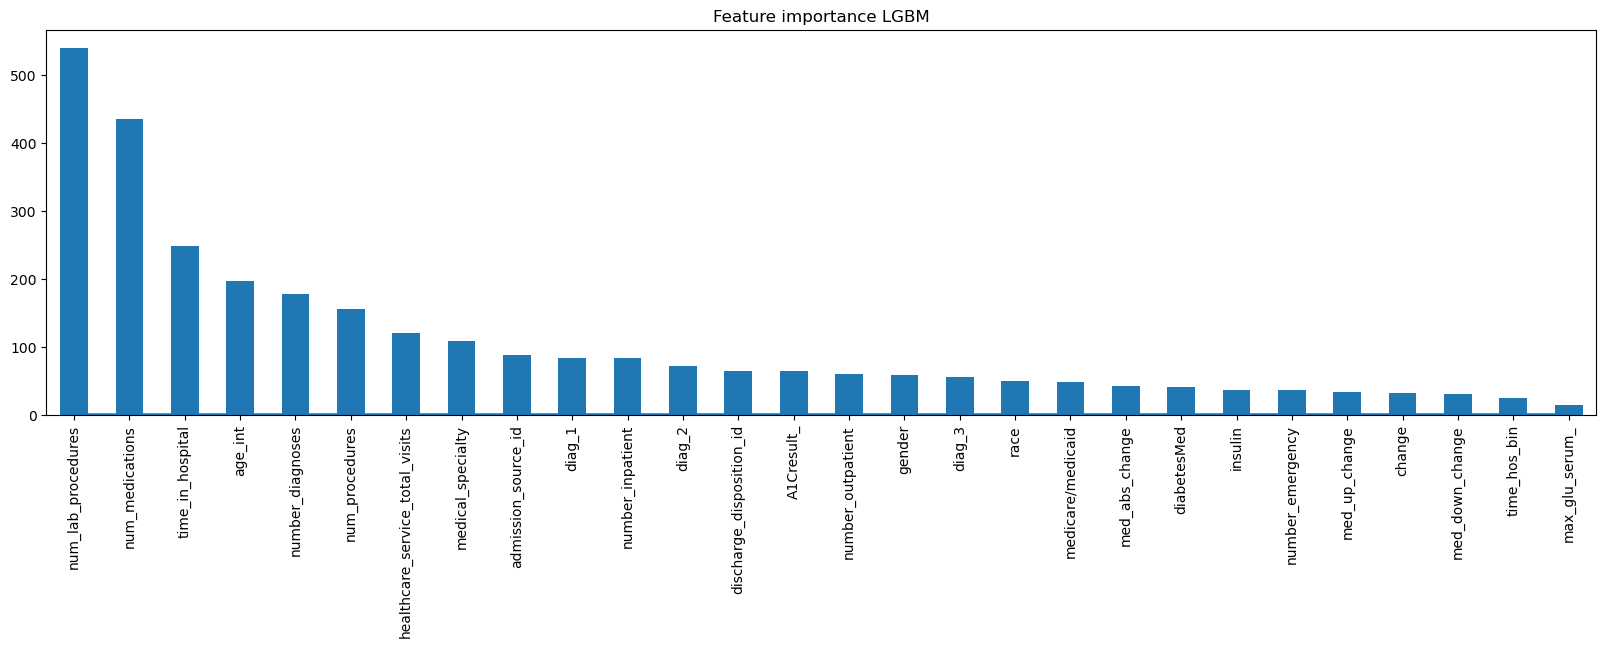

0    24
dtype: int64

In [9]:
feature_importance=pd.DataFrame()
test_score=[]
for seed in range(15):
    print(seed)

    
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                is_unbalance=True,verbose=-1,n_jobs=1)
    model_lgbm.fit(X_train,y_train)
    feature_importance=pd.concat([feature_importance,pd.DataFrame(model_lgbm.feature_importances_,index=model_lgbm.feature_name_)],axis=1)
    test_score.append(auc(y_test,model_lgbm.predict(X_test)))
    print(auc(y_test,model_lgbm.predict(X_test)))
    
feature_importance["mean_importance"]=feature_importance.mean(1)    
feature_importance["mean_importance"].sort_values(ascending=False).plot(kind="bar",figsize=(20,5),title="Feature importance LGBM")
top_features=feature_importance["mean_importance"].sort_values(ascending=False).index
top_features
features=[]
scores=[]
for i,f in enumerate(top_features):
    features.append(f)
    X_test_=X_test[features]
    X_train_=X_train[features]
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                is_unbalance=True,verbose=-1,n_jobs=1)
    model_lgbm.fit(X_train_,y_train)
    print(auc(y_test,model_lgbm.predict(X_test_)))
    scores.append(auc(y_test,model_lgbm.predict(X_test_)))
plt.plot(range(len(scores)),scores)
plt.show()
pd.DataFrame(scores,).idxmax()

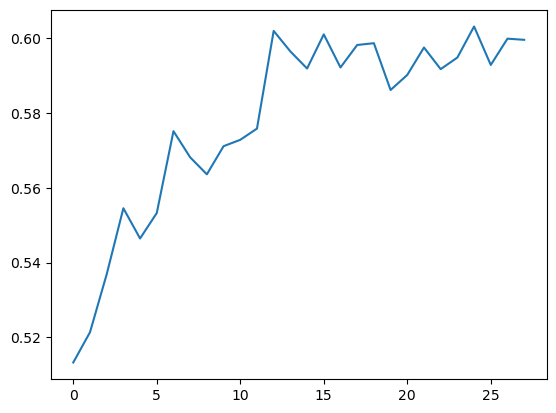

In [13]:
plt.plot(range(len(scores)),scores)
plt.show()

In [48]:
best_features=top_features[:24]
len(best_features)

24

In [ ]:
#X_test=X_test.loc[:,best_features]
#X_train=X_train.loc[:,best_features]

In [20]:
def param_plot(test_res,param_name,n_seeds,param_range):
    test_res["mean"]=test_res.iloc[:,:n_seeds].mean(1)
    test_res["std"]=test_res.iloc[:,:n_seeds].std(1)
    test_res[param_name]=param_range
    test_res.plot(param_name,"mean",title="LGBM",figsize=(10,5))#,yerr="std")
    print(test_res.loc[test_res["mean"].idxmax(),param_name])

# lr 0.01

(55976, 28)
Fitting 5 folds for each of 40 candidates, totalling 200 fits


/home/labs/nyosef/elibe/miniforge3/envs/ML_sklearn/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


************************* {'learning_rate': 0.01, 'n_estimators': 480} 0.6383003430638339 GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_freq=5,
                                      data_sample_strategy='goss',
                                      is_unbalance=True, max_cat_to_onehot=10,
                                      metric='auc', n_jobs=1,
                                      objective='binary', random_state=0,
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01],
                         'n_estimators': range(200, 1000, 20)},
             scoring='roc_auc', verbose=1)
0.5993887078266728
(55976, 28)
Fitting 5 folds for each of 40 candidates, totalling 200 fits
************************* {'learning_rate': 0.01, 'n_estimators': 460} 0.6384848410628757 GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_freq=5,
                                      data_sample_strategy='goss',


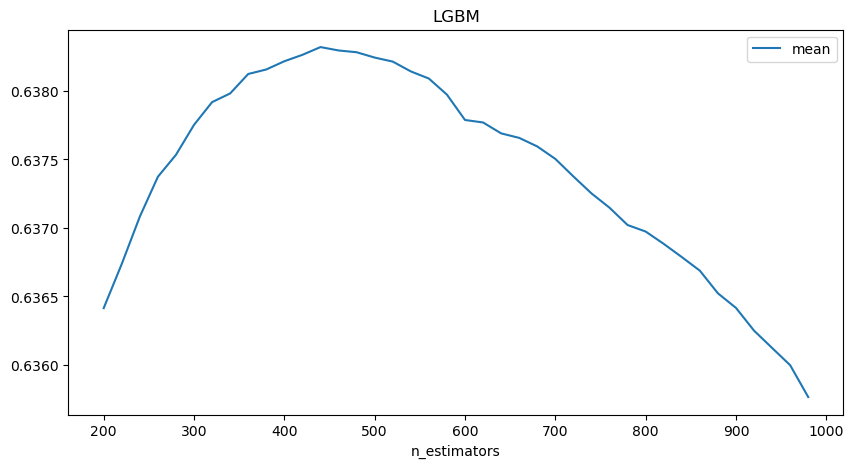

In [20]:
test_res=pd.DataFrame()
param="n_estimators"
for seed in range(5):
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)




        
    test_params = {
        "learning_rate":[0.01],
        "n_estimators":range(200,1000,20),

        }


    model = GridSearchCV(estimator = model_lgbm,param_grid = test_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1,)


    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))
param_plot(test_res,"n_estimators",max(range(5)),range(200,1000,20))

(55976, 28)
Fitting 5 folds for each of 50 candidates, totalling 250 fits


************************* {'learning_rate': 0.01, 'n_estimators': 440, 'num_leaves': 34} 0.6390039815456224 GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_freq=5,
                                      data_sample_strategy='goss',
                                      is_unbalance=True, max_cat_to_onehot=10,
                                      metric='auc', n_jobs=1,
                                      objective='binary', random_state=0,
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'n_estimators': [440],
                         'num_leaves': range(20, 70)},
             scoring='roc_auc', verbose=1)
0.6025050281642877
(55976, 28)
Fitting 5 folds for each of 50 candidates, totalling 250 fits
************************* {'learning_rate': 0.01, 'n_estimators': 440, 'num_leaves': 21} 0.638542837756386 GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_freq=5,
                  

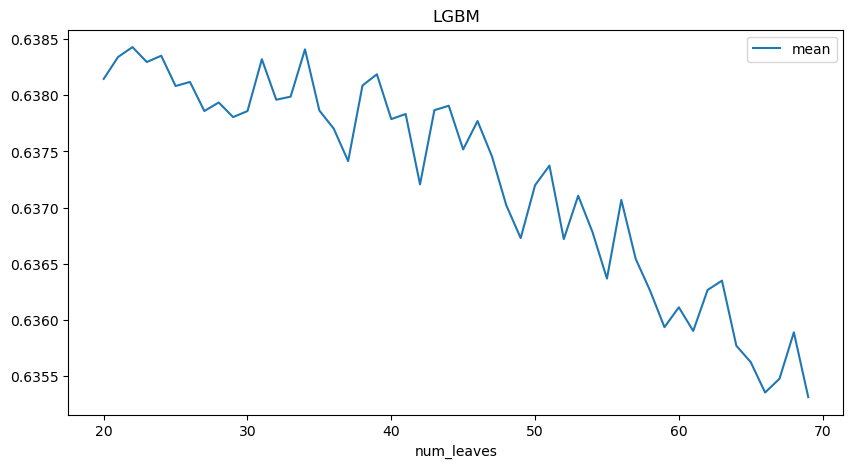

In [21]:
test_res=pd.DataFrame()
param="num_leaves"
for seed in range(5):
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)




        
    test_params = {
        "learning_rate":[0.01],
        "n_estimators":[440],
        "num_leaves":range(20,70,1),
        }


    model = GridSearchCV(estimator = model_lgbm,param_grid = test_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1,)


    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))
param_plot(test_res,"num_leaves",max(range(5)),range(20,70,1))

(55976, 28)
Fitting 5 folds for each of 10 candidates, totalling 50 fits
************************* {'feature_fraction': 0.5, 'learning_rate': 0.01, 'n_estimators': 440, 'num_leaves': 22} 0.6408556913519738 GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_freq=5,
                                      data_sample_strategy='goss',
                                      is_unbalance=True, max_cat_to_onehot=10,
                                      metric='auc', n_jobs=1,
                                      objective='binary', random_state=0,
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'feature_fraction': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9, 1],
                         'learning_rate': [0.01], 'n_estimators': [440],
                         'num_leaves': [22]},
             scoring='roc_auc', verbose=1)
0.5953831271976229
(55976, 28)
Fitting 5 folds for each of 10

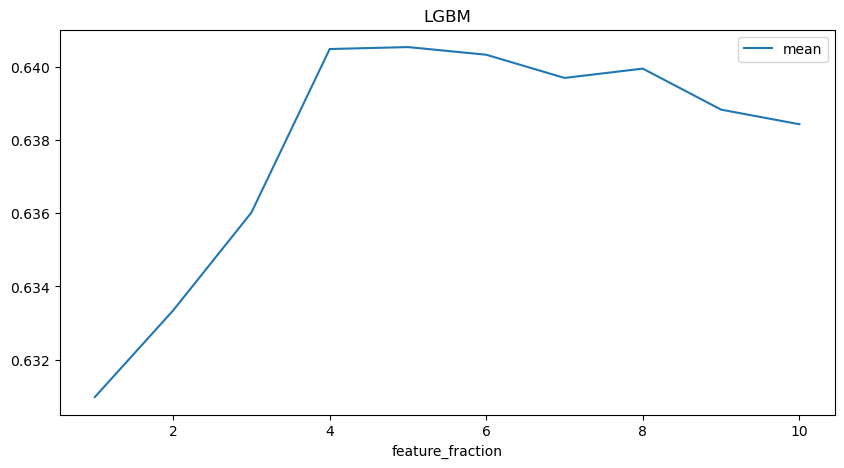

In [22]:
test_res=pd.DataFrame()
param="feature_fraction"
for seed in range(5):
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)




        
    test_params = {
        "learning_rate":[0.01],
        "n_estimators":[440],
        "num_leaves":[22],
        "feature_fraction":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

        }


    model = GridSearchCV(estimator = model_lgbm,param_grid = test_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1,)


    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))
param_plot(test_res,param,max(range(5)),range(1,11))

(55976, 28)
Fitting 5 folds for each of 21 candidates, totalling 105 fits


************************* {'feature_fraction': 0.5, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 440, 'num_leaves': 22} 0.6408746631266201 GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_freq=5,
                                      data_sample_strategy='goss',
                                      is_unbalance=True, max_cat_to_onehot=10,
                                      metric='auc', n_jobs=1,
                                      objective='binary', random_state=0,
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'feature_fraction': [0.5], 'learning_rate': [0.01],
                         'max_depth': range(-1, 20), 'n_estimators': [440],
                         'num_leaves': [22]},
             scoring='roc_auc', verbose=1)
0.5993102087294123
(55976, 28)
Fitting 5 folds for each of 21 candidates, totalling 105 fits
************************* {'feature_fraction': 0.5, 'learning_rate': 0.01, 'max_depth'

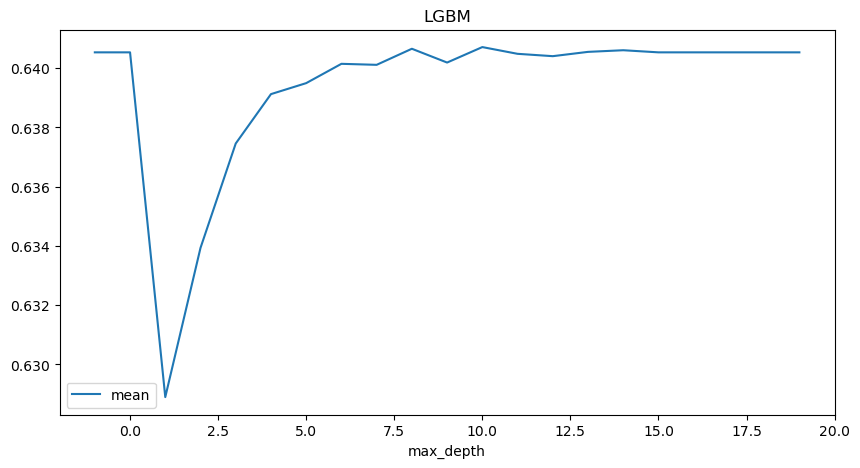

In [24]:
test_res=pd.DataFrame()
param="max_depth"
for seed in range(5):
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)




        
    test_params = {
        "learning_rate":[0.01],
        "n_estimators":[440],
        "num_leaves":[22],
        "max_depth":range(-1,20,1),
        "feature_fraction":[0.5],

        }


    model = GridSearchCV(estimator = model_lgbm,param_grid = test_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=1,)


    print(X_train.shape)
    model.fit(X_train,y_train)
    test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)

    print("*************************",model.best_params_,model.best_score_,model)
    print(auc(y_test,model.predict(X_test)))
param_plot(test_res,param,max(range(5)),range(-1,20,1))

In [ ]:
def objective001(trial,data,target):


    param = {
        "learning_rate":[0.01],
        "n_estimators":[440],
        "num_leaves":[22],

        "max_depth":[trial.suggest_int("max_depth",8,11)],

        "feature_fraction":[0.5],
        "max_bins":[trial.suggest_int("max_bins",63,255,)],


        "lambda_l1": [trial.suggest_float("lambda_l1", 1e-6, 100, log=True)],
        "lambda_l2": [trial.suggest_float("lambda_l2", 1e-6, 100, log=True)],
        "min_data_in_leaf":[trial.suggest_int("min_data_in_leaf", 2, 100,)],

    }

    model_lgbm = LGBMClassifier(random_state=0,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)
    model = GridSearchCV(estimator = model_lgbm,param_grid = param,cv=5,scoring="roc_auc",n_jobs=-1,)



    model.fit(data,target)

    return model.best_score_ - model.cv_results_["std_test_score"][model.best_index_]



study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective001(trial, data=X_train, target=y_train), n_trials=500,)
print("lr=0.01",study.best_params, study.best_value)

In [ ]:
lr=0.01 {'max_depth': 11, 'max_bins': 255, 'lambda_l1': 0.012361523358392836, 'lambda_l2': 1.542342339747553e-05, 'min_data_in_leaf': 91} 0.6329868956827642

In [9]:
#optuna params
cv_score=[]
test_score=[]
for seed in range(15):
    print(seed)
    
    model_lgbm = LGBMClassifier(random_state=seed,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)




        
    param = {
        "learning_rate":[0.01],
        "n_estimators":[440],
        "num_leaves":[22],

        "max_depth":[11],

        "feature_fraction":[0.5],
        "max_bins":[255],


        "lambda_l1": [0.012361523358392836],
        "lambda_l2": [1.542342339747553e-05],
        "min_data_in_leaf":[91],

    }

    model = GridSearchCV(estimator = model_lgbm,param_grid = param,cv=5,scoring="roc_auc",n_jobs=-1,verbose=0,)


    #print(X_train.shape)
    model.fit(X_train,y_train)
    #test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)
    cv_score.append(model.best_score_)
    test_score.append(auc(y_test,model.predict(X_test)))
    print("***",model.best_score_,)
    print(auc(y_test,model.predict(X_test)))
print("cv_score mean:",np.mean(cv_score))
print("cv_score std:",np.std(cv_score))
print("test_score mean:",np.mean(test_score))
print("test_score std:",np.std(test_score))




0
*** 0.6421288845461686
0.5994516009281032
1
*** 0.640526358922368
0.5978638863182955
2
*** 0.6407955073945448
0.6023581941955078
3
*** 0.6410898493042259
0.6000973263707866
4
*** 0.640501781456979
0.6015554705583037
5
*** 0.640687584597079
0.5992730858495526
6
*** 0.6409974856266226
0.598128938051077
7
*** 0.6411035099893152
0.5985488613096088
8
*** 0.640990473416716
0.6004898218570885
9
*** 0.6413518527363596
0.6010393155379111
10
*** 0.6405097433710403
0.6002209859048773
11
*** 0.6408701288496108
0.600377984099398
12
*** 0.6404292332190431
0.6014436328006132
13
*** 0.6409557026456245
0.5993064245099827
14
*** 0.6401867375184647
0.5982622926927974
cv_score mean: 0.6408749889062775
cv_score std: 0.00045025751660868885
test_score mean: 0.599894521398927
test_score std: 0.0013144965300551246


In [26]:
#default params
cv_score=[]
test_score=[]
for seed in range(15):
    print(seed)
    
    model_lgbm = LGBMClassifier(random_state=seed,
                                is_unbalance=True,
                                verbose=-1,n_jobs=1)




        
    test_params = {
        "num_leaves":[31],
        }


    model = GridSearchCV(estimator = model_lgbm,param_grid = test_params,cv=5,scoring="roc_auc",n_jobs=-1,verbose=0,)


    #print(X_train.shape)
    model.fit(X_train,y_train)
    #test_res=pd.concat([test_res,pd.DataFrame(model.cv_results_).sort_values(f"param_{param}",ascending=True).mean_test_score],axis=1)
    cv_score.append(model.best_score_)
    test_score.append(auc(y_test,model.predict(X_test)))
    print("***",model.best_score_,)
    print(auc(y_test,model.predict(X_test)))
print("cv_score mean:",np.mean(cv_score))
print("cv_score std:",np.std(cv_score))     
print("test_score mean:",np.mean(test_score))
print("test_score std:",np.std(test_score))




0
*** 0.6222052760132436
0.5995662846690012
1
*** 0.6222052760132436
0.5995662846690012
2
*** 0.6222052760132436
0.5995662846690012
3
*** 0.6222052760132436
0.5995662846690012
4
*** 0.6222052760132436
0.5995662846690012
5
*** 0.6222052760132436
0.5995662846690012
6
*** 0.6222052760132436
0.5995662846690012
7
*** 0.6222052760132436
0.5995662846690012
8
*** 0.6222052760132436
0.5995662846690012
9
*** 0.6222052760132436
0.5995662846690012
10
*** 0.6222052760132436
0.5995662846690012
11
*** 0.6222052760132436
0.5995662846690012
12
*** 0.6222052760132436
0.5995662846690012
13
*** 0.6222052760132436
0.5995662846690012
14
*** 0.6222052760132436
0.5995662846690012
cv_score mean: 0.6222052760132436
cv_score std: 0.0
test_score mean: 0.5995662846690012
test_score std: 0.0


In [10]:
feature_importance=pd.DataFrame()
test_score=[]
for seed in range(15):
    print(seed)
    test_params = {
        "learning_rate":0.01,
        "n_estimators":440,
        "num_leaves":22,

        "max_depth":11,

        "feature_fraction":0.5,
        "max_bins":255,


        "lambda_l1": 0.012361523358392836,
        "lambda_l2": 1.542342339747553e-05,
        "min_data_in_leaf":91,

    }
    
    model_lgbm = LGBMClassifier(**test_params,random_state=seed,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)
    model_lgbm.fit(X_train,y_train)
    feature_importance=pd.concat([feature_importance,pd.DataFrame(model_lgbm.feature_importances_,index=model_lgbm.feature_name_)],axis=1)
    test_score.append(auc(y_test,model_lgbm.predict(X_test)))
    print(auc(y_test,model_lgbm.predict(X_test)))
    

0
0.5994516009281032
1
0.5978638863182955
2
0.6023581941955078
3
0.6000973263707866
4
0.6015554705583037
5
0.5992730858495526
6
0.598128938051077
7
0.5985488613096088
8
0.6004898218570885
9
0.6010393155379111
10
0.6002209859048773
11
0.600377984099398
12
0.6014436328006132
13
0.5993064245099827
14
0.5982622926927974


In [11]:
feature_importance["mean_importance"]=feature_importance.mean(1)    

<Axes: title={'center': 'Feature importance LGBM'}>

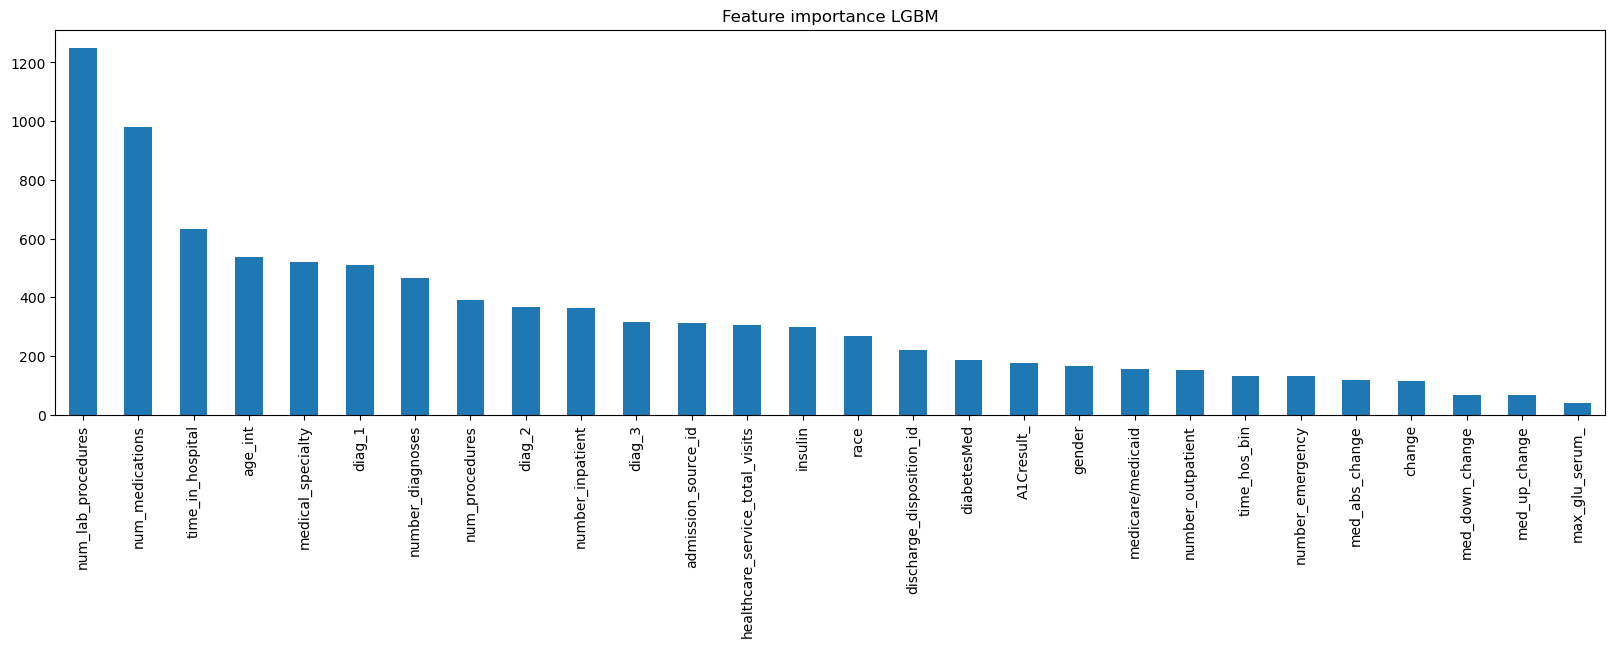

In [12]:
feature_importance["mean_importance"].sort_values(ascending=False).plot(kind="bar",figsize=(20,5),title="Feature importance LGBM")

In [13]:
top_features=feature_importance["mean_importance"].sort_values(ascending=False).index
top_features

Index(['num_lab_procedures', 'num_medications', 'time_in_hospital', 'age_int',
       'medical_specialty', 'diag_1', 'number_diagnoses', 'num_procedures',
       'diag_2', 'number_inpatient', 'diag_3', 'admission_source_id',
       'healthcare_service_total_visits', 'insulin', 'race',
       'discharge_disposition_id', 'diabetesMed', 'A1Cresult_', 'gender',
       'medicare/medicaid', 'number_outpatient', 'time_hos_bin',
       'number_emergency', 'med_abs_change', 'change', 'med_down_change',
       'med_up_change', 'max_glu_serum_'],
      dtype='object')

0.5116028546149807
0.5320528076875323
0.5293039319290856
0.5450465349528959
0.559708602594098
0.5578106758146784
0.5575950378562678
0.5638146683225495
0.5620872190647099
0.5793269969028823
0.5816469736096043
0.5797764746024145
0.5783441006364681
0.5761950705694374
0.5767779029106902
0.5969632733685714
0.5996322426754244
0.5970826795651213
0.6010629590907115
0.6008704955669902
0.6009097451156205
0.6015436487819036
0.6018812887237455
0.5997048308844847
0.6012925454942926
0.6013022406019223
0.5998951677394356
0.5982741144691975


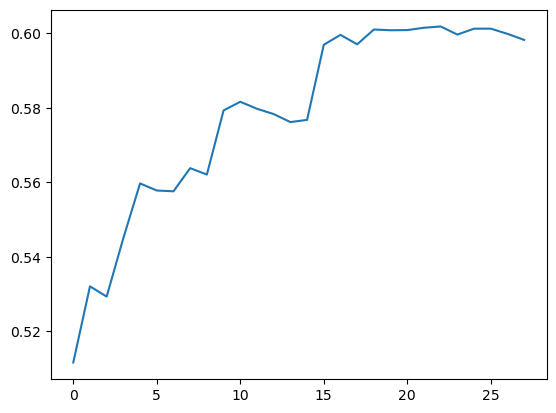

In [14]:
features=[]
scores=[]
for i,f in enumerate(top_features):
    features.append(f)
    X_test_=X_test[features]
    X_train_=X_train[features]
    test_params ={
        "learning_rate":0.01,
        "n_estimators":440,
        "num_leaves":22,

        "max_depth":11,

        "feature_fraction":0.5,
        "max_bins":255,


        "lambda_l1": 0.012361523358392836,
        "lambda_l2": 1.542342339747553e-05,
        "min_data_in_leaf":91,

    }
    
    model_lgbm = LGBMClassifier(**test_params,random_state=0,metric="auc",objective="binary",
                                bagging_freq=5,max_cat_to_onehot=10,data_sample_strategy="goss",
                                is_unbalance=True,verbose=-1,n_jobs=1)
    model_lgbm.fit(X_train_,y_train)
    print(auc(y_test,model_lgbm.predict(X_test_)))
    scores.append(auc(y_test,model_lgbm.predict(X_test_)))
plt.plot(range(len(scores)),scores)


In [15]:
pd.DataFrame(scores,).idxmax()

0    22
dtype: int64

In [38]:
best_features=list(top_features)[0:28]
best_features

['num_lab_procedures',
 'num_medications',
 'time_in_hospital',
 'medical_specialty',
 'age_int',
 'number_diagnoses',
 'diag_1',
 'num_procedures',
 'diag_2',
 'diag_3',
 'insulin',
 'admission_source_id',
 'race',
 'healthcare_service_total_visits',
 'number_inpatient',
 'A1Cresult',
 'gender',
 'diabetesMed',
 'age',
 'number_outpatient',
 'time_hos_bin',
 'med_abs_change',
 'number_emergency',
 'medicare',
 'discharge_disposition_id',
 'change',
 'had_inpatient_days',
 'med_up_change']